<a href="https://colab.research.google.com/github/WanjaWhoopie/Twitter-Sentiment-Analysis/blob/main/Tweety_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **How To Get Tweets**

In [ ]:
#!pip install tweepy #access twitter API

In [ ]:
#!pip install configparser #grab the secret keys from config file, safer when sharing files

In [ ]:
import tweepy
import configparser

In [ ]:
from google.colab import files
keys = files.upload()

Saving config.ini to config.ini


In [ ]:
#read configs
config = configparser.ConfigParser()
config.read('config.ini')


['config.ini']

In [ ]:
api_key = config['twitter']['API_Key']
api_key_secret = config['twitter']['API_Key_Secret']

access_token = config['twitter']['Access_Token']
access_token_secret = config['twitter']['Access_Token_Secret']

#print(api_key)

In [ ]:
#auth
auth = tweepy.OAuthHandler(api_key, api_key_secret )
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [ ]:
public_tweets = api.home_timeline()

print(public_tweets[1].user.screen_name)

print("------------------------")

print(public_tweets[1].text)

JKNjenga
------------------------
The advantage of working with smart people.

For every action from Azimio, there is a corresponding reaction from K… https://t.co/edJOLcHhna


In [ ]:
columns=['Time', 'User', 'Tweet']
data = []

for tweet in public_tweets:
  data.append([tweet.created_at, tweet.user.screen_name, tweet.text])


df = pd.DataFrame(data, columns=columns)
print (df)

df.to_csv('tweets.csv')

                  Time             User  \
0  2022-05-09 15:34:10         cassidoo   
1  2022-05-09 15:32:30         JKNjenga   
2  2022-05-09 15:32:13       kentcdodds   
3  2022-05-09 15:31:44   Africastalking   
4  2022-05-09 15:31:36     TheFunnyVine   
5  2022-05-09 15:31:33          gufydox   
6  2022-05-09 15:30:01      DohaDebates   
7  2022-05-09 15:29:10          ADELLEO   
8  2022-05-09 15:28:41  hallaboutafrica   
9  2022-05-09 15:28:20        ex_easter   
10 2022-05-09 15:26:11     DThompsonDev   
11 2022-05-09 15:26:04         musacoli   
12 2022-05-09 15:25:57     monaeltahawy   
13 2022-05-09 15:25:47       TechCrunch   
14 2022-05-09 15:25:41    africaupdates   
15 2022-05-09 15:25:06      AnthonyLimo   
16 2022-05-09 15:25:03         adafruit   
17 2022-05-09 15:23:59      OkiogaTerry   
18 2022-05-09 15:23:45       kentcdodds   
19 2022-05-09 15:23:15         droid254   

                                                Tweet  
0   RT @wbepodcast: In my chat with @cas

#**Twitter Sentiment Analysis**

In [ ]:
import nltk
import string
import re

from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from nltk.corpus import stopwords

In [ ]:
#libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from nltk.corpus import stopwords


In [ ]:
#Load data
from google.colab import files
uploaded = files.upload()

Saving Login.csv to Login.csv


In [ ]:
#Get data
log = pd.read_csv('Login.csv')

In [ ]:
#Twitter API credentials
api_key = config['twitter']['API_Key']
api_key_secret = config['twitter']['API_Key_Secret']

access_token = config['twitter']['Access_Token']
access_token_secret = config['twitter']['Access_Token_Secret']

In [ ]:
#Create authentication object
auth = tweepy.OAuthHandler(api_key, api_key_secret )

#Set access token and access token secret
auth.set_access_token(access_token, access_token_secret)

#Create API object while passing in auth information
api = tweepy.API(auth, wait_on_rate_limit = True  )

In [ ]:
#Extract 100 tweets from user
posts = api.user_timeline(screen_name = "BillGates", count = 100, lang = 'en', tweet_moode = "extended")

#Print the last 5 tweets from the account
print("Show 5 recent tweets:  \n")

for tweet in posts[0:5]:
  print(tweet.text + '\n')
  print(str(tweet.geo) + '\n')
#print(tweet)

In [ ]:
#Create df with column Tweets
df = pd.DataFrame ([tweet.text for tweet in posts ], columns = ['Tweets'])

df.head()

,Tweets
0,Katalin Kariko (@kkariko) saw the potential of...
1,"Thank you for having me, @EmmanuelMacron, and ..."
2,John’s leadership at @AfricaCDC has been remar...
3,"If we’re going to prevent the next pandemic, t..."
4,@ShereenBhan @CNBCTV18Live Thanks for having me!


In [ ]:
#Clean Text

def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', ' ', text) #removed @mentions
  text = re.sub(r'#', ' ',text) #removing the '#' symbol
  text = re.sub(r'RT[\s]+', ' ', text) #Removing rt
  text = re.sub(r'https?:\/\/\S+', ' ', text) #Remove the hyper link

  return text

df['Tweets'] = df['Tweets'].apply(cleanText)
df


,Tweets
0,Katalin Kariko ( ) saw the potential of mRNA t...
1,"Thank you for having me, , and for your commi..."
2,John’s leadership at has been remarkable – e...
3,"If we’re going to prevent the next pandemic, t..."
4,Thanks for having me!
...,...
95,"The fight to eradicate HIV is far from over, b..."
96,ICYMI here’s a recap of my conversation with ...
97,Thanks for taking the time today to discuss ...
98,: We definitely can. Thanks for y...


In [ ]:
#Get the subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Get polarity`
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

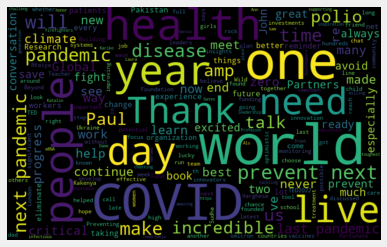

In [ ]:
#Word cloud
allwords = ' '. join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Compute negative, neutral, positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df.head(20)

In [ ]:
#Print +ve tweets
j=1

sortedDF = df.sort_values(by = ['Polarity'])
for i in range (0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j + 1

In [ ]:
sortedDF["Polarity"].head(30)

In [ ]:
#Print -ve tweets
j=1

sortedDF = df.sort_values(by = ['Polarity'], ascending = 'False')
#sortedDF = sortedDF.reset_index(drop = True)
for i in range (0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j + 1


In [ ]:
#Print neut tweets
j=1

sortedDF = df.sort_values(by = ['Polarity'])
#sortedDF = sortedDF.reset_index(drop = True)
for i in range (0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Neutral'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j + 1

<function matplotlib.pyplot.show>

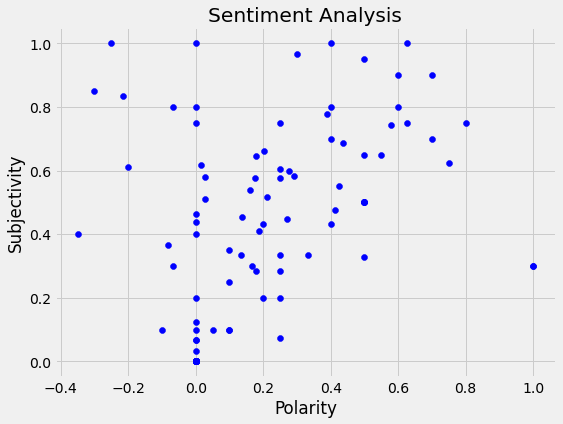

In [ ]:
#Plot polarity and subjectivity
plt.figure(figsize = (8, 6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show

<function matplotlib.pyplot.show>

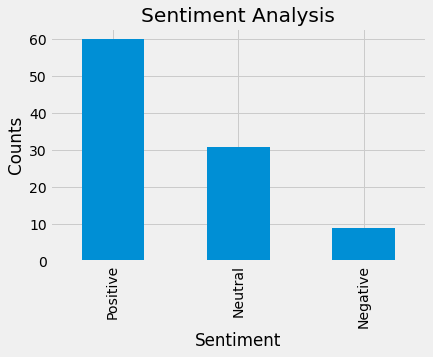

In [ ]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Analysis'].value_counts().plot(kind = 'bar')
plt.show

# **Scraping Data**

In [ ]:
from matplotlib import text
all_tweets = []

search_query = "Covid -filter:retweets"
date_since = "2020-01-01"
location1 = "USA"
location2 = "Canada"

places = api.geo_search(query= location1, granularity="country")
place_id = places[0].id

#tweets = api.search(q="place:%s" % place_id)



for tweet_object in tweepy.Cursor(api.search, q =   "+filter:place:%s" % place_id, since=date_since, lang = 'en').items():
  print("start")
  all_tweets.append(tweet_object.text)
  print("start2")
  all_tweets.append(tweet.user.location)
  print(all_tweets)

In [ ]:
#Extract 100 tweets from user
posts = api.user_timeline(screen_name = "BillGates", count = 10000, lang = 'en', tweet_moode = "extended", q= search_query)

posts_df =  pd.DataFrame ([tweet.text for tweet in posts ], columns = ['Tweets'])

In [ ]:
posts_df.tail(25)

In [ ]:
#Clean Text

def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', ' ', text) #removed @mentions
  text = re.sub(r'#', ' ',text) #removing the '#' symbol
  text = re.sub(r'RT[\s]+', ' ', text) #Removing rt
  text = re.sub(r'https?:\/\/\S+', ' ', text) #Remove the hyper link

  return text

posts_df['Tweets'] = df['Tweets'].apply(cleanText)
posts_df.tail(20)

In [ ]:
#Get the subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Get polarity`
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
posts_df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
posts_df['Polarity'] = df['Tweets'].apply(getPolarity)

posts_df

,Tweets,Subjectivity,Polarity
0,Katalin Kariko ( ) saw the potential of mRNA t...,0.616667,0.016667
1,"Thank you for having me, , and for your commi...",0.000000,0.000000
2,John’s leadership at has been remarkable – e...,0.605556,0.250000
3,"If we’re going to prevent the next pandemic, t...",0.000000,0.000000
4,Thanks for having me!,0.200000,0.250000
...,...,...,...
195,NaN,NaN,NaN
196,NaN,NaN,NaN
197,NaN,NaN,NaN
198,NaN,NaN,NaN


In [ ]:
posts_df.value_counts()

Tweets                                                                                                                  Subjectivity  Polarity 
          .   has started the conversation about how we avoid the next pandemi…                                         0.000000       0.000000    1
Preventing the next pandemic is not cheap, but it'll save lives and money in the long run. The IMF estimates that C…    0.366667      -0.083333    1
Thanks   for taking the time today to discuss omicron, vaccines, and how the world can come together to…                0.200000       0.200000    1
Thank you for having me,  , and for your commitment to tackling some of the world's toughest challeng…                  0.000000       0.000000    1
Thank you   for the productive discussions on the steps being taken in Pakistan to eliminate polio. I’m…                0.000000       0.000000    1
                                                                                                               

In [ ]:
#Compute negative, neutral, positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

posts_df['Analysis'] = df['Polarity'].apply(getAnalysis)

posts_df.head(20)

,Tweets,Subjectivity,Polarity,Analysis
0,Katalin Kariko ( ) saw the potential of mRNA t...,0.616667,0.016667,Positive
1,"Thank you for having me, , and for your commi...",0.000000,0.000000,Neutral
2,John’s leadership at has been remarkable – e...,0.605556,0.250000,Positive
3,"If we’re going to prevent the next pandemic, t...",0.000000,0.000000,Neutral
4,Thanks for having me!,0.200000,0.250000,Positive
5,: “If COVID-19 ends up being the last pandemi...,0.283333,0.250000,Positive
6,"This is amazing, John and Ann. It’s great to s...",0.475000,0.412500,Positive
7,It was an honor to meet front line heroes like...,0.900000,0.700000,Positive
8,I also had a chance to meet up with Gates Foun...,0.000000,0.000000,Neutral
9,What a day! I had a great time in London chatt...,0.750000,0.800000,Positive


In [ ]:
posts_df.dropna()

,Tweets,Subjectivity,Polarity,Analysis
0,Katalin Kariko ( ) saw the potential of mRNA t...,0.616667,0.016667,Positive
1,"Thank you for having me, , and for your commi...",0.000000,0.000000,Neutral
2,John’s leadership at has been remarkable – e...,0.605556,0.250000,Positive
3,"If we’re going to prevent the next pandemic, t...",0.000000,0.000000,Neutral
4,Thanks for having me!,0.200000,0.250000,Positive
...,...,...,...,...
95,"The fight to eradicate HIV is far from over, b...",0.950000,0.500000,Positive
96,ICYMI here’s a recap of my conversation with ...,0.000000,0.000000,Neutral
97,Thanks for taking the time today to discuss ...,0.200000,0.200000,Positive
98,: We definitely can. Thanks for y...,0.350000,0.100000,Positive


In [ ]:
posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweets        100 non-null    object 
 1   Subjectivity  100 non-null    float64
 2   Polarity      100 non-null    float64
 3   Analysis      100 non-null    object 
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


In [ ]:
#changing the column datatype to string
posts_df['Tweets'] = posts_df['Tweets'].astype(str)

#making all my tweets to be lower case
posts_df['clean_tweet'] = posts_df['Tweets'].apply(lambda x: x.lower())
posts_df.head()

,Tweets,Subjectivity,Polarity,Analysis,clean_tweet
0,Katalin Kariko ( ) saw the potential of mRNA t...,0.616667,0.016667,Positive,katalin kariko ( ) saw the potential of mrna t...
1,"Thank you for having me, , and for your commi...",0.000000,0.000000,Neutral,"thank you for having me, , and for your commi..."
2,John’s leadership at has been remarkable – e...,0.605556,0.250000,Positive,john’s leadership at has been remarkable – e...
3,"If we’re going to prevent the next pandemic, t...",0.000000,0.000000,Neutral,"if we’re going to prevent the next pandemic, t..."
4,Thanks for having me!,0.200000,0.250000,Positive,thanks for having me!


In [ ]:
stop = set(stopwords.words('english'))

def stop_words_removal(df):
    posts_df['nonstop_tweet'] = posts_df['clean_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    return posts_df

posts_df = stop_words_removal(posts_df)
posts_df

LookupError: ignored

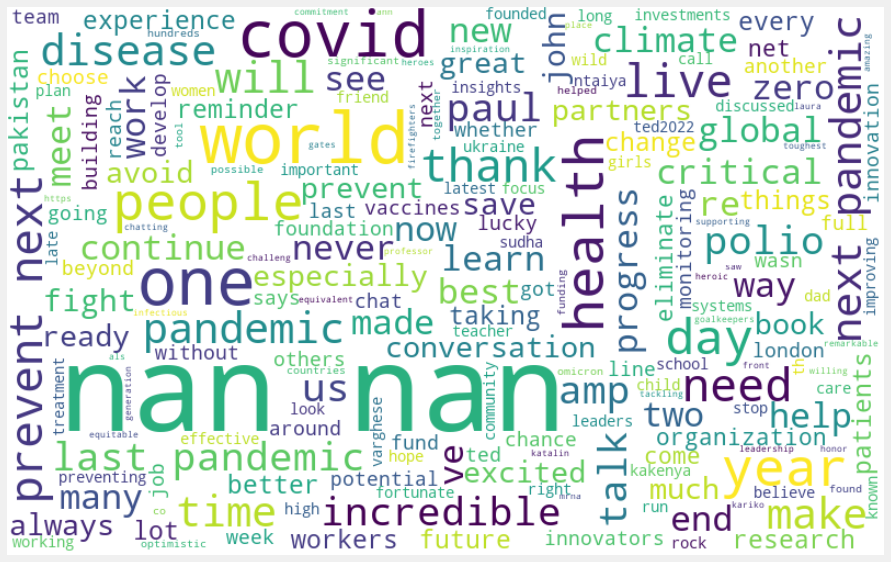

In [ ]:
#plotting all words
all_words = ' '.join([text for text in posts_df['clean_tweet']])

wordcloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#plot pro_vaccine texts

a = nltk.FreqDist(hashtag)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 15)
plt.figure(figsize=(18,8))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("Most used hashtags")
plt.show()

NameError: ignored